# House pricing prediction project

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
datas = pd.read_csv('AmesHousing.tsv', sep='\t')

In [3]:
datas

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
def transform_features(df):
    return df

def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train = df[0:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include=['int', 'float'])
    numeric_test = test.select_dtypes(include=['int', 'float'])
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    
    predictions = lr.predict(test[features])
    mse = mean_squared_error(predictions, test['SalePrice'])
    rmse = np.sqrt(mse)
    
    return rmse

# First model 

In [7]:
transformed_df = transform_fetatures(datas)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df)

print(rmse)

57088.25161263909


# Missing value treatment

### Delete columns with minimum 5% of missing values

In [37]:
num_missing = datas.isnull().sum()

In [38]:
num_missing

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [39]:
drop_missing_columns =num_missing[num_missing > len(datas)/20].sort_values()

In [42]:
drop_missing_columns.index

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

In [43]:
datas = datas.drop(columns=drop_missing_columns.index)

In [45]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

### Remove text columns with minimum one missing values

In [46]:
text_features = datas.select_dtypes(include=['object'])

In [48]:
text_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Lot Shape       2930 non-null   object
 3   Land Contour    2930 non-null   object
 4   Utilities       2930 non-null   object
 5   Lot Config      2930 non-null   object
 6   Land Slope      2930 non-null   object
 7   Neighborhood    2930 non-null   object
 8   Condition 1     2930 non-null   object
 9   Condition 2     2930 non-null   object
 10  Bldg Type       2930 non-null   object
 11  House Style     2930 non-null   object
 12  Roof Style      2930 non-null   object
 13  Roof Matl       2930 non-null   object
 14  Exterior 1st    2930 non-null   object
 15  Exterior 2nd    2930 non-null   object
 16  Mas Vnr Type    2907 non-null   object
 17  Exter Qual      2930 non-null   object
 18  Exter Co

In [49]:
text_features.isnull().sum()

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

In [51]:
num_text_null = text_features.isnull().sum()

In [52]:
num_text_null

MS Zoning          0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      23
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Heating            0
Heating QC         0
Central Air        0
Electrical         1
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Sale Condition     0
dtype: int64

In [53]:
text_columns_to_remove = num_text_null[num_text_null > 0].sort_values()

In [54]:
text_columns_to_remove

Electrical         1
Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Exposure     83
dtype: int64

In [55]:
datas = datas.drop(columns=text_columns_to_remove.index)

In [56]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [57]:
verification = datas.select_dtypes(include=['object']).isnull().sum()

In [58]:
verification

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Heating           0
Heating QC        0
Central Air       0
Kitchen Qual      0
Functional        0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64

### Replace numerical missing value by most common value 

In [59]:
numerical_missing_value = datas.select_dtypes(include=['int', 'float']).isnull().sum().sort_values()

In [60]:
numerical_missing_value

Order               0
Mo Sold             0
Misc Val            0
Pool Area           0
Screen Porch        0
3Ssn Porch          0
Enclosed Porch      0
Open Porch SF       0
Wood Deck SF        0
Fireplaces          0
TotRms AbvGrd       0
Kitchen AbvGr       0
Bedroom AbvGr       0
Half Bath           0
Full Bath           0
Yr Sold             0
SalePrice           0
MS SubClass         0
Low Qual Fin SF     0
2nd Flr SF          0
1st Flr SF          0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Lot Area            0
Gr Liv Area         0
PID                 0
Garage Area         1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
BsmtFin SF 1        1
Garage Cars         1
Bsmt Full Bath      2
Bsmt Half Bath      2
Mas Vnr Area       23
dtype: int64

In [79]:
numerical_col_missing_value = numerical_missing_value[(numerical_missing_value > 0) & (numerical_missing_value < len(datas)/20)]

In [80]:
numerical_col_missing_value

Garage Area        1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
BsmtFin SF 1       1
Garage Cars        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

#### test with column Garage Area

In [77]:
datas['Garage Area'].value_counts().sort_values(ascending=False).index[0]

0.0

In [89]:
remplacement_values_dict = datas[numerical_col_missing_value.index].mode().to_dict(orient='records')[0]

In [90]:
remplacement_values_dict

{'Garage Area': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'Garage Cars': 2.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

### Replacing values in numerical columns 

In [91]:
datas = datas.fillna(remplacement_values_dict)

In [94]:
#Check if missing values still present
datas.isnull().sum().value_counts()

0    64
dtype: int64

# New useful features

In [97]:
years_sold = datas['Yr Sold'] - datas['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [98]:
year_since_remod = datas['Yr Sold'] - datas['Year Remod/Add']
year_since_remod[year_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [100]:
datas = datas.drop([1702, 2180, 2181], axis=0)

In [101]:
datas['Year before sale'] = years_sold
datas['Year Since Remod'] = year_since_remod

# Drop useless columns

In [102]:
datas = datas.drop(columns=['PID', 'Order'])

In [103]:
datas = datas.drop(columns=['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'])

In [104]:
datas.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Year before sale,Year Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,13,12


In [105]:
def transform_features(df, percent_missing=0.05):
    num_missing=df.isnull().sum()
    drop_missing_column=num_missing[num_missing>len(df)*percent_missing].sort_values()
    df=df.drop(columns=drop_missing_column.index)
    
    text_mv_counts=df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_column_text=text_mv_counts[text_mv_counts>0]
    df=df.drop(columns=drop_missing_column_text.index)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)*percent_missing) & 
                                       (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(
        orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(columns=["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", 
                  "Year Remod/Add"])
    return df

In [107]:
datas = pd.read_csv('AmesHousing.tsv', sep='\t')
transformed_df = transform_features(datas)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df)

print(rmse)

55275.36731241307


# Features selection

### Heatmap

In [118]:
numerical_features = transformed_df.select_dtypes(include=['int', 'float'])

In [119]:
import seaborn

<AxesSubplot:>

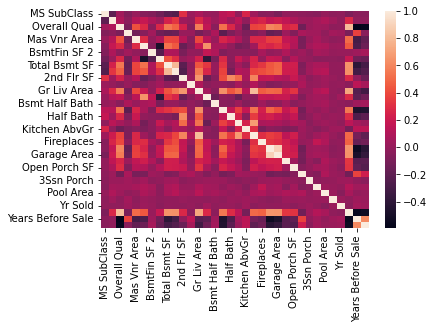

In [120]:
seaborn.heatmap(numerical_features.corr())

In [121]:
abs_corr_coeffs = numerical_features.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2         0.006127
Misc Val             0.019273
Yr Sold              0.030358
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice 

In [122]:
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [123]:
transformed_df = transformed_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)
transformed_df.shape[1]

39

In [124]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley",
                    "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", 
                    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", 
                    "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type",
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [125]:
transform_cat_cols = []
for col in nominal_features:
    if col in transformed_df.columns:
        transform_cat_cols.append(col)
transform_cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [126]:
uniqueness_counts = transformed_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
uniqueness_counts

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [128]:
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transformed_df = transformed_df.drop(drop_nonuniq_cols, axis=1)

In [129]:
text_cols = transformed_df.select_dtypes(include=['object'])
for col in text_cols:
    transformed_df[col] = transformed_df[col].astype('category')

In [130]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MS Zoning          2927 non-null   category
 1   Street             2927 non-null   category
 2   Lot Shape          2927 non-null   category
 3   Land Contour       2927 non-null   category
 4   Utilities          2927 non-null   category
 5   Lot Config         2927 non-null   category
 6   Land Slope         2927 non-null   category
 7   Condition 1        2927 non-null   category
 8   Condition 2        2927 non-null   category
 9   Bldg Type          2927 non-null   category
 10  House Style        2927 non-null   category
 11  Overall Qual       2927 non-null   int64   
 12  Roof Style         2927 non-null   category
 13  Roof Matl          2927 non-null   category
 14  Mas Vnr Area       2927 non-null   float64 
 15  Exter Qual         2927 non-null   category
 16  Exter 

In [131]:
transformed_df = pd.concat([
    transformed_df,
    pd.get_dummies(transformed_df.select_dtypes(include=['category']))
], axis=1)

In [132]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Columns: 152 entries, MS Zoning to Paved Drive_Y
dtypes: category(22), float64(5), int64(9), uint8(116)
memory usage: 742.5 KB


In [133]:
pd.set_option('display.max_columns', 500)

In [134]:
transformed_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,Hip,CompShg,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,Gable,CompShg,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900

In [135]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour",
                        "Lot Config", "Neighborhood", "Condition 1", "Condition 2", 
                        "Bldg Type", "House Style", "Roof Style", "Roof Matl","Exterior 1st",
                        "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                        "Central Air", "Garage Type","Misc Feature", "Sale Type", 
                        "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
            
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

# Train and tests

In [146]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])
        
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
        avg_rmse = np.mean(rmse_values)
        
        return avg_rmse

In [147]:
datas = pd.read_csv('AmesHousing.tsv', sep='\t')
transformed_df = transform_features(datas)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df)

print(rmse)

33367.28718340316


In [148]:
datas = pd.read_csv('AmesHousing.tsv', sep='\t')
transformed_df = transform_features(datas)
filtered_df = select_features(transformed_df)
rmse = train_and_test(filtered_df, k=1)

print(rmse)

30261.212834114434


Text(0, 0.5, 'RMSE')

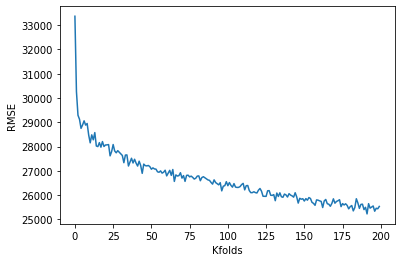

In [153]:
from sklearn.model_selection import KFold
data = pd.read_csv("AmesHousing.tsv", delimiter='\t')

transformed_data = transform_features(data)
final_data = select_features(transformed_data)

results = []
for i in range(200):
    result = train_and_test(final_data, k=i)
    results.append(result)
    
x = [i for i in range(200)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')

In [154]:
min(results)

25222.265813453752